In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re


In [21]:
def clean_water_quality_df(df, bdl_default=0.05):
    df_clean = df.copy()

    for col in df_clean.columns:
        if '_Min' in col or '_Max' in col:
            df_clean[col] = df_clean[col].astype(str)

            def bdl_to_numeric(val):
                val = val.strip()
                if val.startswith('BDL'):
                    match = re.search(r'BDL\(?([0-9.]+)?\)?', val)
                    if match and match.group(1):
                        return float(match.group(1)) / 2
                    else:
                        return bdl_default
                try:
                    return float(val)
                except:
                    return None

            df_clean[col] = df_clean[col].apply(bdl_to_numeric)

    # Average values
    for col in df_clean.columns:
        if '_Min' in col:
            base = col.replace('_Min', '')
            max_col = base + '_Max'
            if max_col in df_clean.columns:
                df_clean[base] = (df_clean[col] + df_clean[max_col]) / 2

    return df_clean


In [ ]:
from glob import glob

# Folder path to rivers
river_path = 'data/rivers/'
files = sorted(glob(os.path.join(river_path, 'rivers_*.csv')))

dfs = []
for file in files:
    year = int(os.path.basename(file).split('_')[-1].split('.')[0])
    df = pd.read_csv(file, encoding='latin1')
    #print river df columns  
    print(df.columns)

    df['Year'] = year
    df = clean_water_quality_df(df)
    dfs.append(df)

# Combine all years into one DataFrame
river_df = pd.concat(dfs, ignore_index=True)

# Optional: drop _Min and _Max columns
cols_to_drop = [col for col in river_df.columns if '_Min' in col or '_Max' in col]
river_df.drop(columns=cols_to_drop, inplace=True)


Index(['STATION CODE', 'STATE', 'TEMPERATURE_Min', 'TEMPERATURE_Max', 'DO_Min',
       'DO_MAX', 'pH_Min', 'PH_Max', 'CONDUCTIVITY_Min', 'CONDUCTIVITY_Max',
       'BOD_Min', 'BOD_Max', 'NITRATE_NITRATE_Min', 'NITRATE_NITRATE_Max',
       'FECALCOLIFORM_Min', 'FECALCOLIFORM_Max', 'TOTALCOLIFORM_Min',
       'TOTALCOLIFORM_Max'],
      dtype='object')
Index(['STATION CODE', 'STATE', 'TEMPERATURE_Min', 'TEMPERATURE_Max', 'DO_Min',
       'DO_MAX', 'pH_Min', 'PH_Max', 'CONDUCTIVITY_Min', 'CONDUCTIVITY_Max',
       'BOD_Min', 'BOD_Max', 'NITRATE_NITRATE_Min', 'NITRATE_NITRATE_Max',
       'FECALCOLIFORM_Min', 'FECALCOLIFORM_Max', 'TOTALCOLIFORM_Min',
       'TOTALCOLIFORM_Max'],
      dtype='object')
Index(['STATION CODE', 'STATE', 'TEMPERATURE_Min', 'TEMPERATURE_Max', 'DO_Min',
       'DO_MAX', 'pH_Min', 'PH_Max', 'CONDUCTIVITY_Min', 'CONDUCTIVITY_Max',
       'BOD_Min', 'BOD_Max', 'NITRATE_NITRATE_Min', 'NITRATE_NITRATE_Max',
       'FECALCOLIFORM_Min', 'FECALCOLIFORM_Max', 'TOTALCOLIFOR

In [26]:
print(river_df.columns)
print(river_df[['STATE', 'Year']].value_counts().head())


Index(['STATION CODE', 'STATE', 'DO_MAX', 'Year', 'TEMPERATURE',
       'CONDUCTIVITY', 'BOD', 'NITRATE_NITRATE', 'FECALCOLIFORM',
       'TOTALCOLIFORM', 'FecalStreptococci', 'Unnamed: 20'],
      dtype='object')
STATE             Year
MADHYA PRADESH    2023    161
                  2022    152
MAHARASHTRA       2012    147
HIMACHAL PRADESH  2023    144
                  2022    137
Name: count, dtype: int64


In [27]:
print(river_df.columns.tolist())


['STATION CODE', 'STATE', 'DO_MAX', 'Year', 'TEMPERATURE', 'CONDUCTIVITY', 'BOD', 'NITRATE_NITRATE', 'FECALCOLIFORM', 'TOTALCOLIFORM', 'FecalStreptococci', 'Unnamed: 20']


ValueError: Could not interpret value `do_max` for `y`. An entry with this name does not appear in `data`.

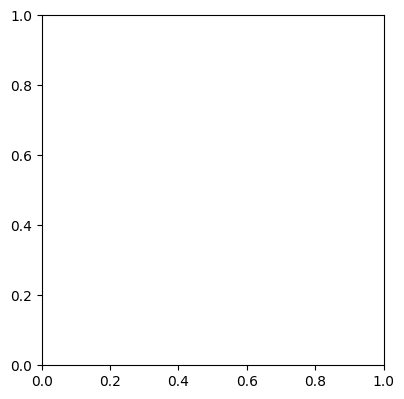

In [30]:
# Parameters to visualize
params = ['do_max', 'ph_min', 'bod', 'nitrate_nitrate', 'fecalcoliform', 'totalcoliform']


# Group by year and state
grouped = river_df.groupby(['Year']).mean(numeric_only=True).reset_index()

plt.figure(figsize=(15, 10))
for i, param in enumerate(params):
    plt.subplot(2, 3, i+1)
    sns.lineplot(data=grouped, x='Year', y=param)
    plt.title(f"{param} Trend")
    plt.xlabel('Year')
    plt.ylabel(param)

plt.tight_layout()
plt.show()

